In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [ ]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)


In [ ]:
#1º Importamos los datos
import pandas as pd

path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"

df = pd.read_csv(path)
print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)
# For now, just drop NA's (rows with missing values)

print(df.columns)


Read 82332 rows.
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [ ]:
import numpy as np
#Creamos variable dataset para no tocar df
dataset=df

#Trabajamos con DATASET y ETIQUETAS
#PREPARAMOS LABELS
if 'attack_cat' in dataset.columns:
  etiquetas=dataset["attack_cat"]
  dataset=dataset.drop("attack_cat", axis=1)
if 'label' in dataset.columns:
  ataqueBinario=dataset["label"]
  dataset=dataset.drop("label", axis=1)

print(dataset.columns)
print(etiquetas)

#Para saber de que tipo es cada columna
i=0;
for t in df.dtypes.tolist():
  print(i, t)
  i+=1
#print (df.shape[1])

print(dataset.shape[1])#numero de columnas

TiposAtaque = np.unique(etiquetas)
print(TiposAtaque)

#print(type(etiquetas))
#print(type(labels))
#print(type(df.values))
#print(type(data2))

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 82332, dtype: object
0 int64
1 float64
2 object
3 object
4 object
5 int64
6 int64
7 int64
8 int64
9 float64
10 int64
11 int64
12 float64
13 float64
14 int64
15 int64
16 float64
17 float64
18 float64
19 float64
20 int64
21 int6

In [ ]:
pip install tcav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')
    print(os.getcwd())

/content
/


In [ ]:
from tensorflow.io import gfile
from tcav.utils import create_session

In [ ]:
# 1º Make source directory para las siguientes operaciones
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/* #borramos si ya existen cosas
source_dir = "./tcav/tcav_examples/discrete/unsw_sanity2"
working_dir = source_dir

acts_dir = os.path.join(working_dir, "activations")#crear path dentro de working_dir
gfile.makedirs(acts_dir) #crear directorio

cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)

!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

activations  cav


In [ ]:
#Estudio conceptos
path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)
df.dropna(inplace=True,axis=1)

import pandas as pd
import os
import numpy as np
from sklearn import metrics


def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

analyze(df)

proto_counts=df["proto"].value_counts()
used_proto_types = proto_counts.sort_values(ascending=False)#mayor menor
for proto, count in used_proto_types.items():
  print(proto, ',', count)

#Duracion -> Umbral
duration_estadisticas=df["dur"].describe()
print(duration_estadisticas)
umbral=0.001

eventos_anomalos=df[df['dur'] < umbral]
ataques_anomalos = eventos_anomalos[eventos_anomalos['attack_cat'] != 'Normal']
normales_anomalos = df[(df['dur'] < umbral) & (df['attack_cat'] == 'Normal')]
numero_ataques_anomalos = ataques_anomalos.shape[0]
numero_normal_anomalos = normales_anomalos.shape[0]
print("Número de eventos", len(eventos_anomalos))
print("Número de ataques", numero_ataques_anomalos)
print("Número de normales", numero_normal_anomalos)

eventos_noanomalos=df[df['dur'] > umbral]
ataques_noanomalos = eventos_noanomalos[eventos_noanomalos['attack_cat'] != 'Normal']
normales_noanomalos = df[(df['dur'] > umbral) & (df['attack_cat'] == 'Normal')]
numero_ataques_noanomalos = ataques_noanomalos.shape[0]
numero_normal_noanomalos = normales_noanomalos.shape[0]
print("Número de eventos", len(eventos_noanomalos))
print("Número de ataques", numero_ataques_noanomalos)
print("Número de normales", numero_normal_noanomalos)


82332 rows
** id:82332 (100%)
** dur:39888 (48%)
** proto:131 (0%)
** service:[-:57.27%,dns:25.95%,http:10.07%,smtp:2.25%,ftp:1.89%,ftp-data:1.7%,pop3:0.51%,ssh:0.25%,ssl:0.04%,snmp:0.04%,dhcp:0.03%,radius:0.01%,irc:0.01%]
** state:[FIN:47.78%,INT:41.49%,CON:8.48%,REQ:2.24%,ACC:0.0%,RST:0.0%,CLO:0.0%]
** spkts:420 (0%)
** dpkts:436 (0%)
** sbytes:4489 (5%)
** dbytes:4034 (4%)
** rate:40616 (49%)
** sttl:[254:65.65%,31:20.29%,62:12.6%,0:1.27%,29:0.06%,1:0.05%,255:0.03%,60:0.03%,32:0.02%,30:0.0%,63:0.0%]
** dttl:[0:43.81%,252:35.56%,29:20.24%,60:0.27%,30:0.05%,31:0.04%,253:0.01%,32:0.0%]
** sload:42873 (52%)
** dload:40614 (49%)
** sloss:253 (0%)
** dloss:311 (0%)
** sinpkt:39970 (48%)
** dinpkt:37617 (45%)
** sjit:39944 (48%)
** djit:38381 (46%)
** swin:[255:52.33%,0:47.66%,156:0.0%,202:0.0%,99:0.0%,5:0.0%,67:0.0%,154:0.0%,52:0.0%,245:0.0%,43:0.0%]
** stcpb:39219 (47%)
** dtcpb:39108 (47%)
** dwin:[255:50.3%,0:49.68%,27:0.0%,81:0.0%,160:0.0%,77:0.0%,171:0.0%,137:0.0%,164:0.0%,33:0.0%,2

In [ ]:
import pandas as pd
import argparse
from tensorflow.io import gfile
import os


def make_concepts_targets_and_randoms(source_dir):
  # Make concept folders with the csv files
  # We need this, since sklearn does not provide us with column names or types
  # categorical_variables = ["protocol_type", "service","flag","labels"]

  #No tenemos que crear el dataframe porque ya tenemos el original que es df
  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)
  #if 'label' in df.columns: #NO ESTOY SEGURA DE SI HAY QUE QUITAR BIN
  # df=df.drop("label", axis=1)

  def make_concept_folder(df, concept):
    # Create the folder and save the dataframe as a csv file there
    path = os.path.join(source_dir, concept)
    if not gfile.exists(path):
      gfile.makedirs(path)

    concept_file_name = os.path.join(path, concept + ".csv")
    df.to_csv(concept_file_name, index=False)

  concept_true = df[df["is_sm_ips_ports"] == 1]
  concept_false = df[df["is_sm_ips_ports"] == 0]

  make_concept_folder(concept_true,
                      "is_sm_ips_ports_true")
  make_concept_folder(concept_false,
                      "is_sm_ips_ports_false")

  #PROTOCOL BASED CONCEPTS: TCP, UDP, ICMP
  tcp_df = df[df["proto"] == "tcp"]
  udp_df = df[df["proto"] == "udp"]
  make_concept_folder(tcp_df, "protocol_tcp")
  make_concept_folder(udp_df, "protocol_udp")

  #SERVICE TYPES CONCEPTS
  dns_df = df[df["service"] == "dns"]
  http_df = df[df["service"] == "http"]
  make_concept_folder(dns_df, "service_dns")
  make_concept_folder(http_df, "service_http")

  #CONNECTION DURATION CONCEPTS
  umbral=0.001
  short_dur_df = df[df["dur"] > umbral]
  long_dur_df = df[df["dur"] < umbral]
  make_concept_folder(short_dur_df, "duration_short")
  make_concept_folder(long_dur_df, "duration_long")

  #ESTADO CONEXIONES CONCEPTS
  fin_df = df[df["state"] == "FIN"] #finalizado
  int_df = df[df["state"] == "INT"] #intermedia
  con_df = df[df["state"] == "CON"] #establecida
  req_df = df[df["state"] == "REQ"] #requerida
  make_concept_folder(fin_df, "state_fin")
  make_concept_folder(int_df, "state_int")
  make_concept_folder(con_df, "state_con")
  make_concept_folder(req_df, "state_req")

  #TIME TO LIVE
  #STTL: paquetes enviados desde origen

  big_df = df[df["sttl"] == 254]
  small_df = df[df["sttl"] == 31]
  medium_df = df[df["sttl"] == 62]
  make_concept_folder(big_df, "sttl_big")
  make_concept_folder(small_df, "sttl_small")
  make_concept_folder(medium_df, "sttl_medium")

  #DTTL: paquetes recibidos en destino
  null_df = df[df["dttl"] == 0]
  big_df = df[df["dttl"] == 252]
  medium_df = df[df["dttl"] == 29]
  make_concept_folder(null_df, "dttl_null")
  make_concept_folder(big_df, "dttl_big")
  make_concept_folder(medium_df, "dttl_medium")

  concepts_protocol=["protocol_tcp", "protocol_udp"]
  concepts_service=["service_dns",  "service_http"]
  concepts_dur=["duration_short", "duration_long"]
  concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
  concepts_sttl=["sttl_big",  "sttl_small"]
  concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]


  # Making random_examples
  random_size = 10
  random_partitions = 11

  for i in range(random_partitions):
    random_partition_name = "random500_" + str(i)
    randoms = df.sample(random_size)
    make_concept_folder(randoms, random_partition_name)

  # Make target folder
  targets = df.attack_cat.unique()
  print("Available concepts for UNSW_NB15 dataset are: ")
  print(["is_sm_ips_ports_true","is_sm_ips_ports_false"])
  print(concepts_protocol)
  print(concepts_service)
  print(concepts_state)
  print(concepts_sttl)
  print(concepts_dttl)
  print("\n")
  print("Available targets for UNSW_NB15 dataset are: ")
  print(targets)
  print("\n")
  print("Created 10 random folders \n")
  for target in targets:
    target_df = df[df["attack_cat"] == target]
    make_concept_folder(target_df, target)

  # make labels
  with open(os.path.join(source_dir, "labels.txt"), "w") as the_file:
    for target in targets:
      the_file.write(target + "\n")

if not gfile.exists(source_dir):
  gfile.makedirs(os.path.join(source_dir))
  print("Created source directory at " + source_dir)
# Make data
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/*
make_concepts_targets_and_randoms(source_dir)
print("Successfully created data at " + source_dir)
print("final")
!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

Available concepts for UNSW_NB15 dataset are: 
['is_sm_ips_ports_true', 'is_sm_ips_ports_false']
['protocol_tcp', 'protocol_udp']
['service_dns', 'service_http']
['state_fin', 'state_int', 'state_con', 'state_req']
['sttl_big', 'sttl_small']
['dttl_null', 'dttl_big', 'dttl_medium']


Available targets for UNSW_NB15 dataset are: 
['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']


Created 10 random folders 

Successfully created data at ./tcav/tcav_examples/discrete/unsw_sanity2
final
Analysis	Generic		       random500_2     service_http
Backdoor	is_sm_ips_ports_false  random500_3     Shellcode
DoS		is_sm_ips_ports_true   random500_4     state_con
dttl_big	labels.txt	       random500_5     state_fin
dttl_medium	Normal		       random500_6     state_int
dttl_null	protocol_tcp	       random500_7     state_req
duration_long	protocol_udp	       random500_8     sttl_big
duration_short	random500_0	       random500_9     sttl_medium
Expl

In [ ]:
with open("./tcav/tcav_examples/discrete/unsw_sanity2/labels.txt", "r") as file:
    content = file.read()
    print(content)
print(etiquetas.unique())

print(type(etiquetas))
print(type(content))

Normal
Reconnaissance
Backdoor
DoS
Exploits
Analysis
Fuzzers
Worms
Shellcode
Generic

['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']
<class 'pandas.core.series.Series'>
<class 'str'>


In [ ]:
from __future__ import division
from __future__ import print_function

import os
import tensorflow as tf
import argparse
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import OrdinalEncoder

# Needed in order to speed up the activation generator, so we don't have to infer types from sklearn
# when loading concept files. This is also because the sklearn dataset does not contain the
# typing information when loaded.
kFloatIndices = [1, 9, 12, 13, 16, 17, 18, 19, 24, 25, 26]
kIntIndices = [
    0, 5, 6, 7, 8, 10, 11, 14, 15, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42
]
kBytesIndices = [2, 3, 4]


def make_keras_model(categorical_map):
  """Simple feedforward model.

  Uses embedding representation for categorical variables.
  """
  n_features = 43
  n_labels = 10
  # Make all placeholders
  inputs = []
  models = []

  input_layer = tf.keras.layers.Input(shape=(n_features,), name='input')
  inputs.append(input_layer)

  # Splits the input vector into multiple variables
  deconcat = tf.split(input_layer, [1 for i in range(n_features)], 1)

  for index in range(n_features):
    # For categorical variables, we create embedding layers
    if index in categorical_map.keys():
      vocab_size = categorical_map[index]
      inpt = deconcat[index]
      inputs.append(inpt)
      embed = tf.keras.layers.Embedding(vocab_size, 200, \
                                        trainable=True,
                                        embeddings_initializer=tf.compat.v1.initializers.random_normal())(inpt)

      embed_reshaped = tf.keras.layers.Reshape(target_shape=(200,))(embed)
      models.append(embed_reshaped)
    else:
      # Else, create a simple input for numerical features
      inpt = deconcat[index]
      inputs.append(inpt)
      models.append(inpt)

  # Concatenate them into a single vector
  merge_models = tf.keras.layers.concatenate(models)

  # Plug them into the DNN
  net = tf.keras.layers.Dense(1000, activation='relu')(merge_models)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(256, activation='relu')(net)
  net = tf.keras.layers.BatchNormalization()(net)

  pred = tf.keras.layers.Dense(n_labels, activation='sigmoid')(net)
  model_full = tf.keras.models.Model(inputs=input_layer, \
                                     outputs=pred)
  model_full.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
                     metrics=['accuracy'],
                     optimizer='adam')
  return model_full


def encode_variables(data):
  """ Encodes variables using simple ordinal encoding."""
  data2 = np.copy(data)#hacemos una copia independiente en numpy
  #data2=data.copy()
  encoder = OrdinalEncoder() #asigna numero entero a cada categoria en una carateristica
  categorical_indices = kBytesIndices
  data2[:,
        categorical_indices] = encoder.fit_transform(data2[:,
                                                           categorical_indices])
  return data2


def encoding_function(x, label_path):
  """ Matches a label's name with the index from the labels.txt file"""
  # Open label file and get indices
  with tf.io.gfile.GFile(label_path, 'r') as f:
    labels = [l.strip().split(' ')[0] for l in f.readlines()]
  return labels.index(x)


def encode_labels(labels, label_path):
  """Encoding labels according to order in the labels file, so it is compliant with ModelWrapper"""
  labels2 = np.copy(labels)
  encoded = [encoding_function(x, label_path) for x in labels2]
  return encoded


def create_categorical_map(data):
  categorical_indices = kBytesIndices
  # Takes form {index : number of unique values}
  categorical_map = {}
  for index in categorical_indices:
    categorical_map[index] = np.unique(data[:, [index]]).shape[0]
  return categorical_map


def prepare_dataset(labels_path):
  """Fetches data from sklearn.

  Encodes categorical variables with Ordinal Encoding
  """
  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)
  dataset=df
  if 'attack_cat' in dataset.columns:
    etiquetas=dataset["attack_cat"]
    dataset=dataset.drop("attack_cat", axis=1)
  if 'label' in dataset.columns:
    dataset=dataset.drop("label", axis=1)

  #data, labels = sklearn.datasets.fetch_kddcup99(return_X_y=True)
  data = np.array(dataset)
  labels = np.array(etiquetas)
  encoded_data = encode_variables(data)
  encoded_labels = encode_labels(labels, labels_path)
  return encoded_data, encoded_labels


def train_and_save_model(model_path, labels_path):
  # Prepare dataset and split it
  data, labels = prepare_dataset(labels_path)
  train_data, test_data, train_labels, test_labels = train_test_split(
      data, labels, test_size=0.2)

  train_data = np.array(train_data)
  test_data = np.array(test_data)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # Create categorical map for the embedding layer
  categorical_map = create_categorical_map(data)
  model = make_keras_model(categorical_map)

  print(model.summary())
  model.fit(
      train_data,
      train_labels,
      validation_data=(test_data, test_labels),
      epochs=4,
      batch_size=64)
  model.save(model_path)

  # Test on a small subset of predictions
  predictions = model.predict(test_data[:10])
  print(predictions)


In [ ]:
#from tcav.tcav_examples.discrete.kdd99_model import train_and_save_model
from tcav.model import KerasModelWrapper
import tensorflow as tf


class UNSW_NB15KerasModelWrapper(KerasModelWrapper):
  def __init__(self, sess, model_path, labels_path):
    if not tf.io.gfile.exists(labels_path):
      raise Exception(
          "Labels path does not exist. Please provide a labels file.")
    # Train a model if we have none
    if not tf.io.gfile.exists(model_path):
      train_and_save_model(model_path, labels_path)

    # Initialize the wrapper
    super(UNSW_NB15KerasModelWrapper, self).__init__(sess, model_path, labels_path)

    # Using SparseCategoricalCrossEntropy here
    self.y_input = tf.compat.v1.placeholder(tf.float64, shape=[None])
    self.loss = self.model.loss_functions[0](self.y_input,
                                             self.model.outputs[0])
    self._make_gradient_tensors()

In [ ]:
if os.path.exists("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5"):
  os.remove("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5")
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "unswnb15_2.h5")

uci_model = UNSW_NB15KerasModelWrapper(create_session(), model_path, label_path)

Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 43)]         0           []                               
                                                                                                  
 tf_op_layer_split (TensorFlowO  [(None, 1),         0           ['input[0][0]']                  
 pLayer)                         (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                   

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


                                                                  'tf_op_layer_split[0][42]']     
                                                                                                  
 dense (Dense)                  (None, 1000)         641000      ['concatenate[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 1000)        4000        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dense_1 (Dense)                (None, 256)          256256      ['batch_normalization[0][0]']    
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 256)         1024        ['dense_1[0][0]']                
 rmalizati

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


65865/65865 [==============================] - 26s 391us/sample - loss: 1.2649 - accuracy: 0.6134 - val_loss: 1.2447 - val_accuracy: 0.6137
Epoch 2/4
65865/65865 [==============================] - 22s 328us/sample - loss: 1.1846 - accuracy: 0.6229 - val_loss: 1.1941 - val_accuracy: 0.6280
Epoch 3/4
65865/65865 [==============================] - 23s 351us/sample - loss: 1.1438 - accuracy: 0.6307 - val_loss: 1.1467 - val_accuracy: 0.6398
Epoch 4/4
65865/65865 [==============================] - 22s 341us/sample - loss: 1.1021 - accuracy: 0.6377 - val_loss: 1.1319 - val_accuracy: 0.6229


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0.89605176 0.7132538  0.44800448 0.86447376 0.8739002  0.45333123
  0.82460743 0.05575035 0.21203697 0.60259223]
 [0.737901   0.61554104 0.24698295 0.7332571  0.7028129  0.2700334
  0.53071475 0.00792059 0.06300417 0.96577466]
 [0.9590922  0.6525486  0.10849959 0.69329846 0.94147617 0.14046818
  0.8527253  0.04183026 0.12660484 0.2523788 ]
 [0.9213099  0.6545332  0.07085966 0.6033821  0.89535254 0.14588429
  0.8234042  0.02680755 0.15372692 0.36054456]
 [0.663318   0.62642556 0.27006003 0.74479556 0.72581613 0.33146605
  0.5336114  0.00674565 0.0711839  0.9392792 ]
 [0.9972689  0.27094528 0.19442101 0.5823272  0.59710187 0.09632815
  0.46578878 0.01034767 0.15160893 0.40030268]
 [0.9103325  0.606642   0.04044826 0.5407924  0.9165303  0.02847713
  0.85005814 0.00583906 0.14159615 0.25540367]
 [0.9466306  0.4535776  0.04897381 0.45781064 0.8325981  0.05883798
  0.7186171  0.04773387 0.05717689 0.15490781]
 [0.9336301  0.65086037 0.06536073 0.5647781  0.8937062  0.1585975
  0.7898474  0

In [ ]:
import os
from tcav.activation_generator import DiscreteActivationGeneratorBase
#from tcav.tcav_examples.discrete.kdd99_model import encode_variables, kBytesIndices, kFloatIndices, kIntIndices
import numpy as np
import tensorflow as tf


class UNSW_NB15DiscreteActivationGenerator(DiscreteActivationGeneratorBase):


  def __init__(self, model, source_dir, acts_dir, max_examples):
    self.source_dir = source_dir
    super(UNSW_NB15DiscreteActivationGenerator,
          self).__init__(model, source_dir, acts_dir, max_examples)

  def load_data(self, concept):

    concept_folder = os.path.join(self.source_dir, concept)
    concept_file = os.path.join(concept_folder, concept + '.csv')
    with tf.io.gfile.GFile(concept_file, 'r') as f:
      texts = [
          l.strip().split(',') for l in f.readlines()[:self.max_examples + 1]
      ]
    texts = np.array(texts, dtype='O')
    texts = texts[1:]  # remove headers
    texts = texts[:, :-2]  # remove labels y binario
    #texts = self._convert_types(texts)  # Assign proper data types
    return texts

  def transform_data(self, data):

    encoded_data = encode_variables(data)
    return encoded_data

  def _convert_types(self, texts):
    texts[:, kBytesIndices] = texts[:, kBytesIndices].astype(str)
    texts[:, kFloatIndices] = texts[:, kFloatIndices].astype(np.float32)
    texts[:, kIntIndices] = texts[:, kIntIndices].astype(np.int)
    return texts

In [ ]:
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/activations/*
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/cav/*
act_gen = UNSW_NB15DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
#concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
#concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1_prot = "Normal"
target2_prot = "Generic"
target3_prot = "Exploits"
target4_prot = "Fuzzers"
target5_prot = "DoS"
target6_prot = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts=concepts_protocol
alphas = [0.1]



my_tcav1_prot = TCAV(create_session,
                   target1_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1_prot = my_tcav1_prot.run()

my_tcav2_prot = TCAV(create_session,
                   target2_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2_prot = my_tcav2_prot.run()

my_tcav3_prot = TCAV(create_session,
                   target3_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3_prot = my_tcav3_prot.run()

my_tcav4_prot = TCAV(create_session,
                   target4_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4_prot = my_tcav4_prot.run()

my_tcav5_prot = TCAV(create_session,
                   target5_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5_prot = my_tcav5_prot.run()

my_tcav6_prot = TCAV(create_session,
                   target6_prot,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6_prot = my_tcav6_prot.run()


Class = Normal
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.55 (+- 0.29), random was 0.51 (+- 0.31). p-val = 0.731 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.27 (+- 0.36), random was 0.47 (+- 0.41). p-val = 0.147 (not significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.02), random was 0.51 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.42 (+- 0.34), random was 0.47 (+- 0.41). p-val = 0.707 (not significant)
{'dense': {'bn_vals': [0.01, 0.024], 'bn_stds': [0, 0.019595917942265426], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


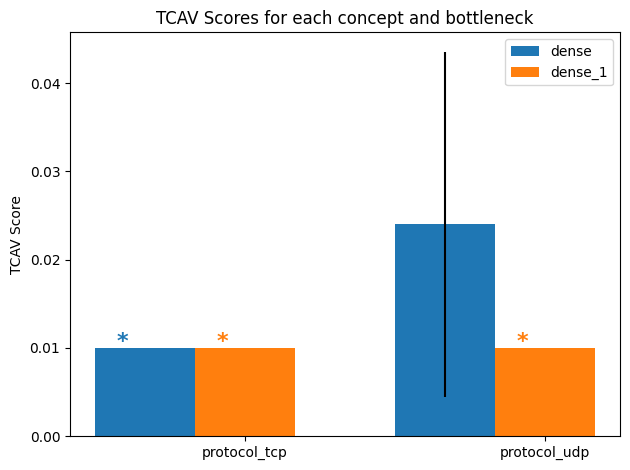

Class = Generic
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.89 (+- 0.30), random was 0.54 (+- 0.48). p-val = 0.028 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.35), random was 0.55 (+- 0.49). p-val = 0.027 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.29 (+- 0.38), random was 0.54 (+- 0.48). p-val = 0.127 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.55 (+- 0.49). p-val = 0.032 (significant)
{'dense': {'bn_vals': [0.8875, 0.01], 'bn_stds': [0.2961355264064074, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.19, 0.19849999999999998], 'bn_stds': [0.34866172717979815, 0.3970141685129134], 'significant': [True, True]}}


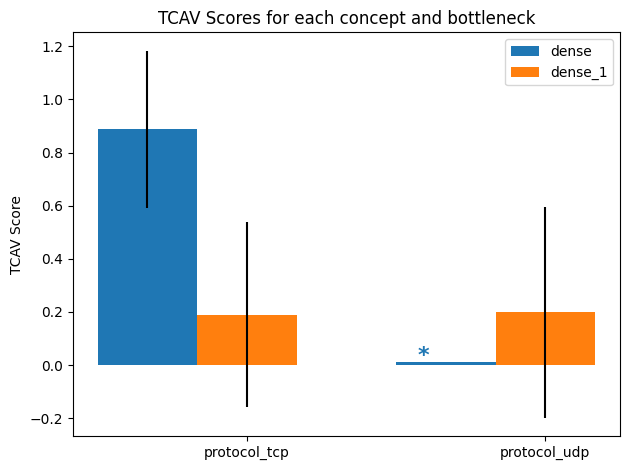

Class = Exploits
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.48 (+- 0.32), random was 0.46 (+- 0.38). p-val = 0.878 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.82 (+- 0.35), random was 0.53 (+- 0.42). p-val = 0.038 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.09), random was 0.46 (+- 0.38). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.73 (+- 0.37), random was 0.53 (+- 0.42). p-val = 0.152 (not significant)
{'dense': {'bn_vals': [0.01, 0.9419999999999998], 'bn_stds': [0, 0.08666602563865497], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.8195, 0.01], 'bn_stds': [0.34730714072705154, 0], 'significant': [True, False]}}


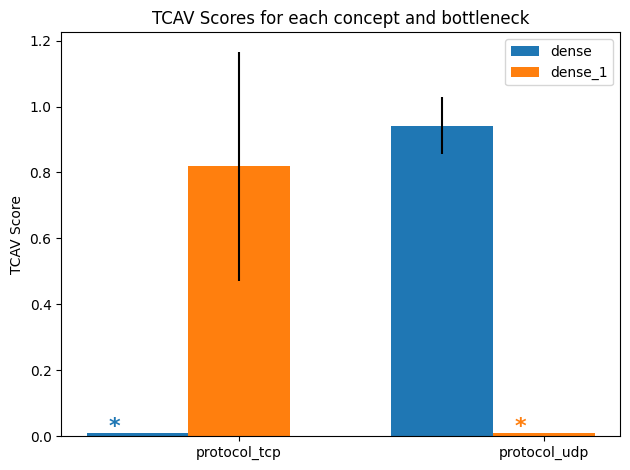

Class = Fuzzers
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.49 (+- 0.27), random was 0.48 (+- 0.35). p-val = 0.891 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.30), random was 0.52 (+- 0.44). p-val = 0.010 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.48 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.81 (+- 0.36), random was 0.52 (+- 0.44). p-val = 0.050 (not significant)
{'dense': {'bn_vals': [0.01, 0.9865], 'bn_stds': [0, 0.01911151485361641], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.9, 0.01], 'bn_stds': [0.30000000000000004, 0], 'significant': [True, False]}}


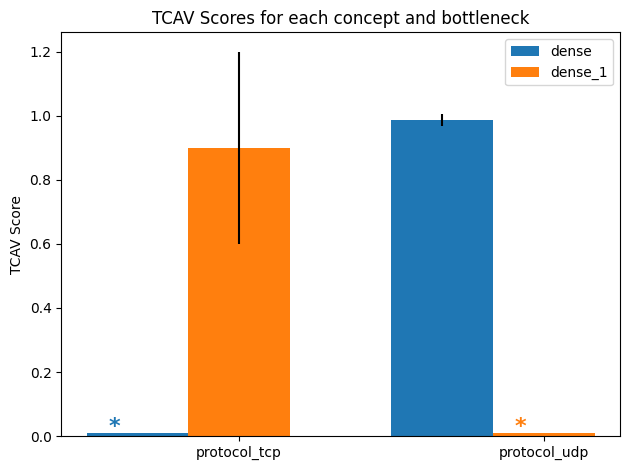

Class = DoS
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.42 (+- 0.20), random was 0.47 (+- 0.37). p-val = 0.701 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.64 (+- 0.38), random was 0.50 (+- 0.41). p-val = 0.326 (not significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.04), random was 0.47 (+- 0.37). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.72 (+- 0.28), random was 0.50 (+- 0.41). p-val = 0.109 (not significant)
{'dense': {'bn_vals': [0.01, 0.9854999999999998], 'bn_stds': [0, 0.035245567097154214], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


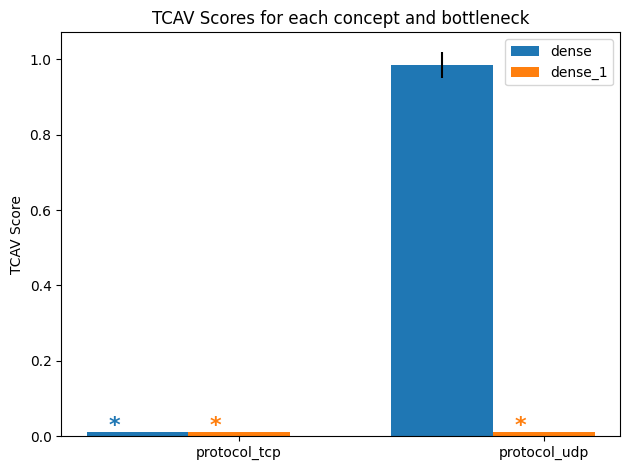

Class = Reconnaissance
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.57 (+- 0.32), random was 0.46 (+- 0.34). p-val = 0.309 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.30), random was 0.51 (+- 0.37). p-val = 0.002 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.03), random was 0.46 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.54 (+- 0.31), random was 0.51 (+- 0.37). p-val = 0.819 (not significant)
{'dense': {'bn_vals': [0.01, 0.9884999999999999], 'bn_stds': [0, 0.03286715685908959], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.9, 0.01], 'bn_stds': [0.30000000000000004, 0], 'significant': [True, False]}}


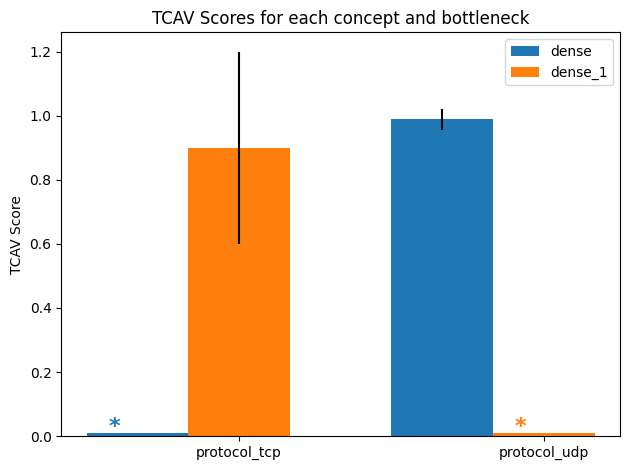

In [ ]:
utils_plot.plot_results(results1_prot, num_random_exp=10)
utils_plot.plot_results(results2_prot, num_random_exp=10)
utils_plot.plot_results(results3_prot, num_random_exp=10)
utils_plot.plot_results(results4_prot, num_random_exp=10)
utils_plot.plot_results(results5_prot, num_random_exp=10)
utils_plot.plot_results(results6_prot, num_random_exp=10)

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
#concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
#concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1_serv = "Normal"
target2_serv = "Generic"
target3_serv = "Exploits"
target4_serv = "Fuzzers"
target5_serv = "DoS"
target6_serv = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts_serv=concepts_service
alphas = [0.1]



my_tcav1_serv = TCAV(create_session,
                   target1_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1_serv = my_tcav1_serv.run()

my_tcav2_serv = TCAV(create_session,
                   target2_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2_serv = my_tcav2_serv.run()

my_tcav3_serv = TCAV(create_session,
                   target3_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3_serv = my_tcav3_serv.run()

my_tcav4_serv = TCAV(create_session,
                   target4_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4_serv = my_tcav4_serv.run()

my_tcav5_serv = TCAV(create_session,
                   target5_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5_serv = my_tcav5_serv.run()

my_tcav6_serv = TCAV(create_session,
                   target6_serv,
                   concepts_serv,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6_serv = my_tcav6_serv.run()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Class = Normal
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.06), random was 0.51 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.13 (+- 0.11), random was 0.47 (+- 0.41). p-val = 0.013 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.31), random was 0.51 (+- 0.31). p-val = 0.943 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.33 (+- 0.35), random was 0.47 (+- 0.41). p-val = 0.312 (not significant)
{'dense': {'bn_vals': [0.11100000000000002, 0.01], 'bn_stds': [0.06264183905346331, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.129, 0.01], 'bn_stds': [0.10617909398747007, 0], 'significant': [True, False]}}


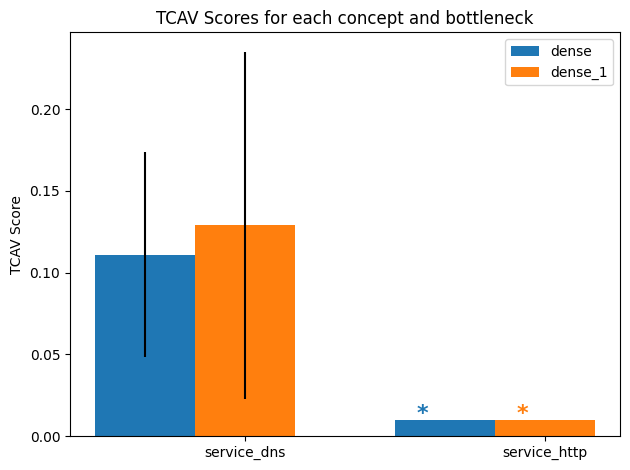

Class = Generic
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.24), random was 0.54 (+- 0.48). p-val = 0.006 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.02), random was 0.55 (+- 0.49). p-val = 0.001 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.71 (+- 0.43), random was 0.54 (+- 0.48). p-val = 0.284 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.37 (+- 0.45), random was 0.55 (+- 0.49). p-val = 0.282 (not significant)
{'dense': {'bn_vals': [0.0985, 0.01], 'bn_stds': [0.23717135155831956, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.009, 0.01], 'bn_stds': [0.018, 0], 'significant': [True, False]}}


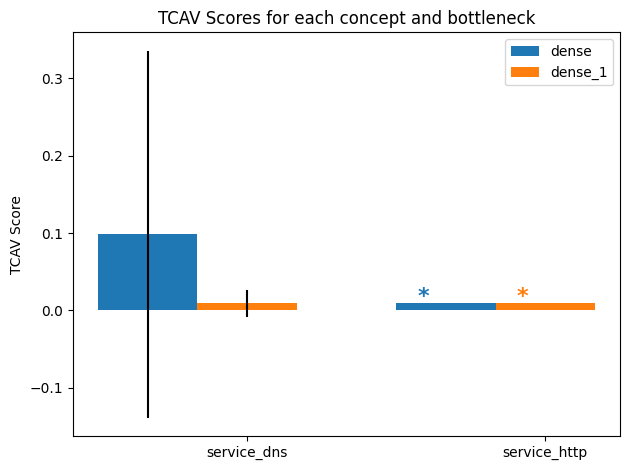

Class = Exploits
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.96 (+- 0.05), random was 0.46 (+- 0.38). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.53 (+- 0.42). p-val = 0.001 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.61 (+- 0.34), random was 0.46 (+- 0.38). p-val = 0.240 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.23), random was 0.53 (+- 0.42). p-val = 0.015 (significant)
{'dense': {'bn_vals': [0.958, 0.01], 'bn_stds': [0.05010987926547021, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [1.0, 0.8654999999999999], 'bn_stds': [0.0, 0.22669858843848145], 'significant': [True, True]}}


/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


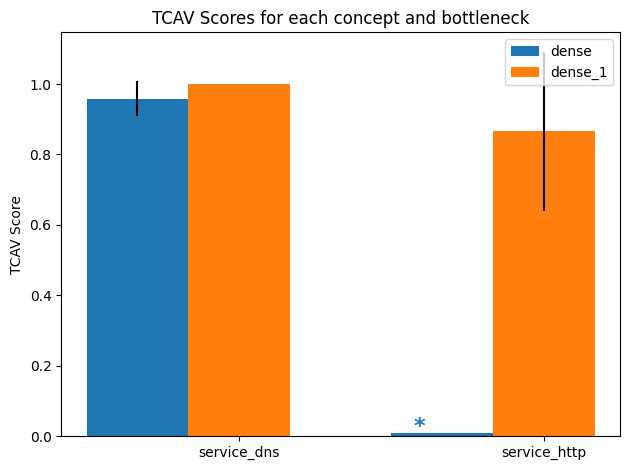

Class = Fuzzers
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.95 (+- 0.06), random was 0.48 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.52 (+- 0.44). p-val = 0.001 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.56 (+- 0.36), random was 0.48 (+- 0.35). p-val = 0.517 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.69 (+- 0.45), random was 0.52 (+- 0.44). p-val = 0.256 (not significant)
{'dense': {'bn_vals': [0.9465, 0.01], 'bn_stds': [0.05740426813399854, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.9924999999999999, 0.01], 'bn_stds': [0.017642278764377364, 0], 'significant': [True, False]}}


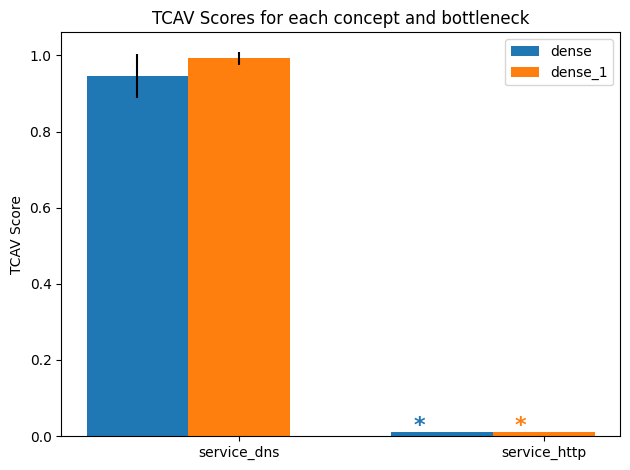

Class = DoS
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.95 (+- 0.10), random was 0.47 (+- 0.37). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.50 (+- 0.41). p-val = 0.000 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.42 (+- 0.30), random was 0.47 (+- 0.37). p-val = 0.670 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.31 (+- 0.28), random was 0.50 (+- 0.41). p-val = 0.158 (not significant)
{'dense': {'bn_vals': [0.9514999999999999, 0.01], 'bn_stds': [0.09669669073965251, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.9959999999999999, 0.01], 'bn_stds': [0.0020000000000000018, 0], 'significant': [True, False]}}


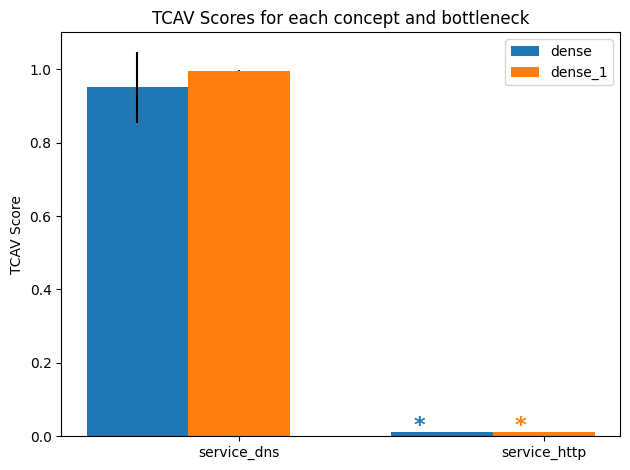

Class = Reconnaissance
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.18), random was 0.46 (+- 0.34). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.51 (+- 0.37). p-val = 0.000 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.63 (+- 0.28), random was 0.46 (+- 0.34). p-val = 0.122 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.73 (+- 0.35), random was 0.51 (+- 0.37). p-val = 0.080 (not significant)
{'dense': {'bn_vals': [0.8285, 0.01], 'bn_stds': [0.1785644141479483, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.998, 0.01], 'bn_stds': [0.0040000000000000036, 0], 'significant': [True, False]}}


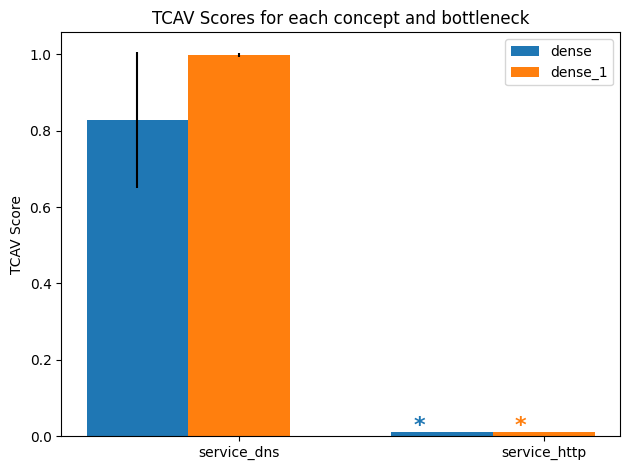

In [ ]:
utils_plot.plot_results(results1_serv, num_random_exp=10)
utils_plot.plot_results(results2_serv, num_random_exp=10)
utils_plot.plot_results(results3_serv, num_random_exp=10)
utils_plot.plot_results(results4_serv, num_random_exp=10)
utils_plot.plot_results(results5_serv, num_random_exp=10)
utils_plot.plot_results(results6_serv, num_random_exp=10)

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
#concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
#concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1_dur = "Normal"
target2_dur = "Generic"
target3_dur = "Exploits"
target4_dur = "Fuzzers"
target5_dur = "DoS"
target6_dur = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts=concepts_dur
alphas = [0.1]



my_tcav1_dur = TCAV(create_session,
                   target1_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1_dur = my_tcav1_dur.run()

my_tcav2_dur = TCAV(create_session,
                   target2_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2_dur = my_tcav2_dur.run()

my_tcav3_dur = TCAV(create_session,
                   target3_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3_dur = my_tcav3_dur.run()

my_tcav4_dur = TCAV(create_session,
                   target4_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4_dur = my_tcav4_dur.run()

my_tcav5_dur = TCAV(create_session,
                   target5_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5_dur = my_tcav5_dur.run()

my_tcav6_dur = TCAV(create_session,
                   target6_dur,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6_dur = my_tcav6_dur.run()

Class = Normal
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.67 (+- 0.22), random was 0.51 (+- 0.31). p-val = 0.124 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.47 (+- 0.41). p-val = 0.000 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.72 (+- 0.23), random was 0.51 (+- 0.31). p-val = 0.041 (significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.29), random was 0.47 (+- 0.41). p-val = 0.002 (significant)
{'dense': {'bn_vals': [0.01, 0.723], 'bn_stds': [0, 0.23459752769370779], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.992, 0.9039999999999999], 'bn_stds': [0.016000000000000014, 0.288], 'significant': [True, True]}}


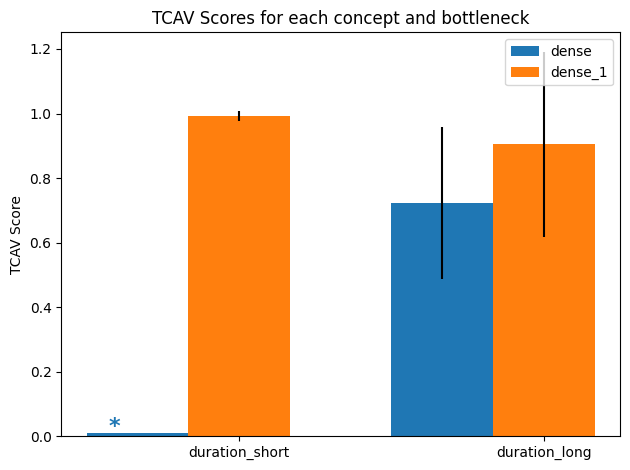

Class = Generic
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.29), random was 0.54 (+- 0.48). p-val = 0.014 (significant)
    Bottleneck = dense_1. TCAV Score = 0.12 (+- 0.29), random was 0.55 (+- 0.49). p-val = 0.008 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.12 (+- 0.29), random was 0.54 (+- 0.48). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.55 (+- 0.49). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.14199999999999996, 0.12049999999999998], 'bn_stds': [0.2879600666759195, 0.2865087258706094], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.12149999999999998, 0.009], 'bn_stds': [0.2859637214752948, 0.013747727084867519], 'significant': [True, True]}}


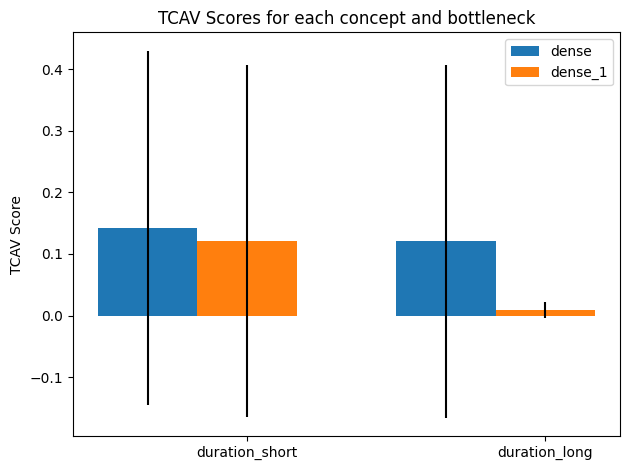

Class = Exploits
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.23 (+- 0.38), random was 0.46 (+- 0.38). p-val = 0.083 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.02 (+- 0.04), random was 0.53 (+- 0.42). p-val = 0.000 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.30), random was 0.46 (+- 0.38). p-val = 0.007 (significant)
    Bottleneck = dense_1. TCAV Score = 0.27 (+- 0.38), random was 0.53 (+- 0.42). p-val = 0.063 (not significant)
{'dense': {'bn_vals': [0.01, 0.1075], 'bn_stds': [0, 0.2958483564260582], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.016, 0.01], 'bn_stds': [0.03903844259188627, 0], 'significant': [True, False]}}


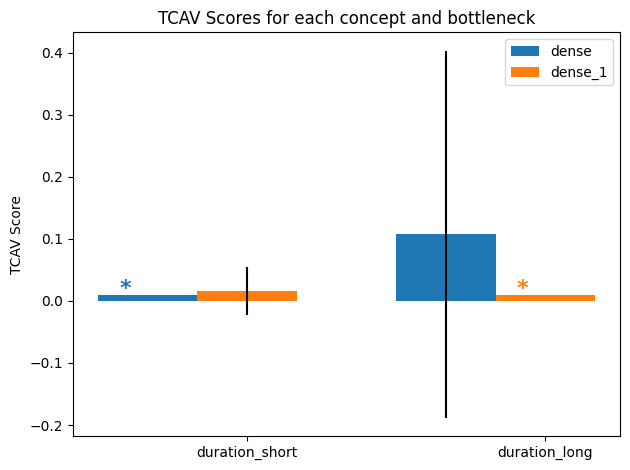

Class = Fuzzers
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.22 (+- 0.38), random was 0.48 (+- 0.35). p-val = 0.036 (significant)
    Bottleneck = dense_1. TCAV Score = 0.09 (+- 0.03), random was 0.52 (+- 0.44). p-val = 0.003 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.48 (+- 0.35). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.17 (+- 0.28), random was 0.52 (+- 0.44). p-val = 0.017 (significant)
{'dense': {'bn_vals': [0.22399999999999998, 0.1], 'bn_stds': [0.37964325359473994, 0.30000000000000004], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.0915, 0.1685], 'bn_stds': [0.02520416632225712, 0.2805178247455944], 'significant': [True, True]}}


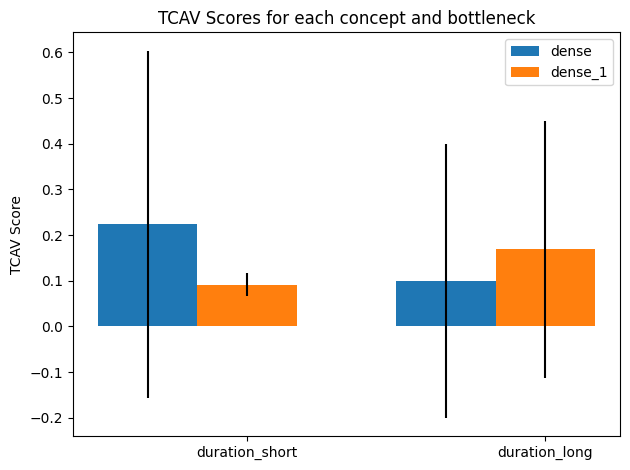

Class = DoS
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.27 (+- 0.31), random was 0.47 (+- 0.37). p-val = 0.116 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.50 (+- 0.41). p-val = 0.000 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.19 (+- 0.27), random was 0.47 (+- 0.37). p-val = 0.023 (significant)
    Bottleneck = dense_1. TCAV Score = 0.33 (+- 0.36), random was 0.50 (+- 0.41). p-val = 0.213 (not significant)
{'dense': {'bn_vals': [0.01, 0.18850000000000003], 'bn_stds': [0, 0.27118305625536415], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.0, 0.01], 'bn_stds': [0.0, 0], 'significant': [True, False]}}


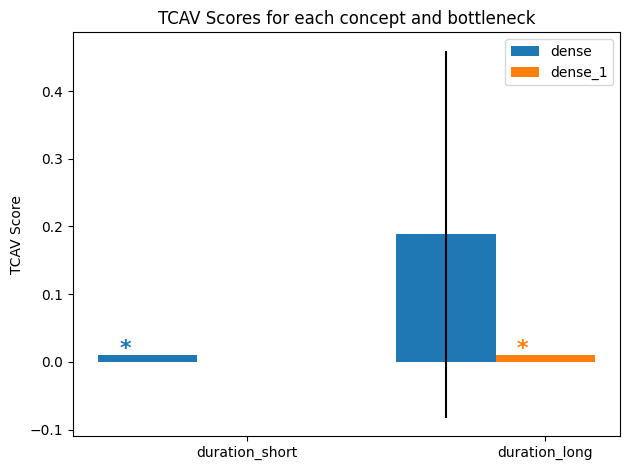

Class = Reconnaissance
  Concept = duration_short
    Bottleneck = dense. TCAV Score = 0.23 (+- 0.39), random was 0.46 (+- 0.34). p-val = 0.050 (significant)
    Bottleneck = dense_1. TCAV Score = 0.22 (+- 0.19), random was 0.51 (+- 0.37). p-val = 0.017 (significant)
  Concept = duration_long
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.30), random was 0.46 (+- 0.34). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.29 (+- 0.32), random was 0.51 (+- 0.37). p-val = 0.071 (not significant)
{'dense': {'bn_vals': [0.22949999999999998, 0.1], 'bn_stds': [0.3918957131686949, 0.30000000000000004], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.2185, 0.01], 'bn_stds': [0.1933397269057759, 0], 'significant': [True, False]}}


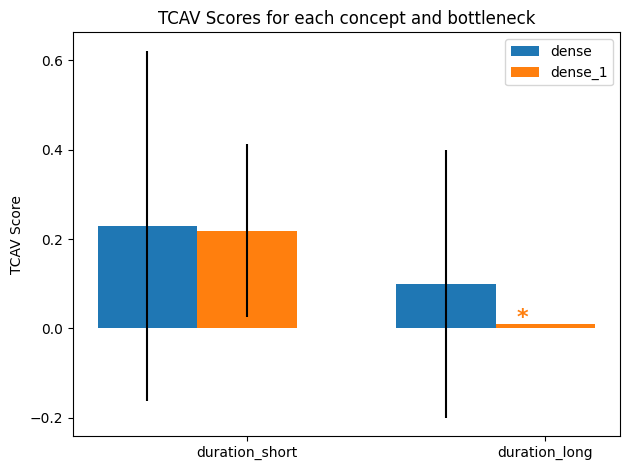

In [ ]:
utils_plot.plot_results(results1_dur, num_random_exp=10)
utils_plot.plot_results(results2_dur, num_random_exp=10)
utils_plot.plot_results(results3_dur, num_random_exp=10)
utils_plot.plot_results(results4_dur, num_random_exp=10)
utils_plot.plot_results(results5_dur, num_random_exp=10)
utils_plot.plot_results(results6_dur, num_random_exp=10)

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
#concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
#concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1_state = "Normal"
target2_state = "Generic"
target3_state = "Exploits"
target4_state = "Fuzzers"
target5_state = "DoS"
target6_state = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts=concepts_state
alphas = [0.1]



my_tcav1_state = TCAV(create_session,
                   target1_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1_state = my_tcav1_state.run()

my_tcav2_state = TCAV(create_session,
                   target2_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2_state = my_tcav2_state.run()

my_tcav3_state = TCAV(create_session,
                   target3_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3_state = my_tcav3_state.run()

my_tcav4_state = TCAV(create_session,
                   target4_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4_state = my_tcav4_state.run()

my_tcav5_state = TCAV(create_session,
                   target5_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5_state = my_tcav5_state.run()

my_tcav6_state = TCAV(create_session,
                   target6_state,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6_state = my_tcav6_state.run()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Class = Normal
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.47 (+- 0.30), random was 0.51 (+- 0.31). p-val = 0.707 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.18 (+- 0.26), random was 0.47 (+- 0.41). p-val = 0.036 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.78 (+- 0.02), random was 0.51 (+- 0.31). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.09), random was 0.47 (+- 0.41). p-val = 0.000 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.16 (+- 0.18), random was 0.51 (+- 0.31). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.20), random was 0.47 (+- 0.41). p-val = 0.043 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.51 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.96 (+- 0.12), random was 0.47 (+- 0.41). p-val = 0.000 (significant)
{'dense': {'bn_vals':

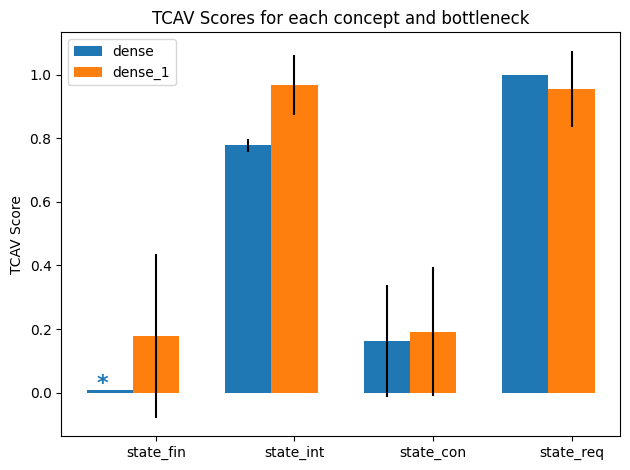

Class = Generic
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.89 (+- 0.30), random was 0.54 (+- 0.48). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.55 (+- 0.49). p-val = 0.001 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.07 (+- 0.13), random was 0.54 (+- 0.48). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.12 (+- 0.30), random was 0.55 (+- 0.49). p-val = 0.009 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.21 (+- 0.38), random was 0.54 (+- 0.48). p-val = 0.044 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.55 (+- 0.49). p-val = 0.006 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.29), random was 0.54 (+- 0.48). p-val = 0.006 (significant)
    Bottleneck = dense_1. TCAV Score = 0.12 (+- 0.30), random was 0.55 (+- 0.49). p-val = 0.009 (significant)
{'dense': {'bn_vals': [0

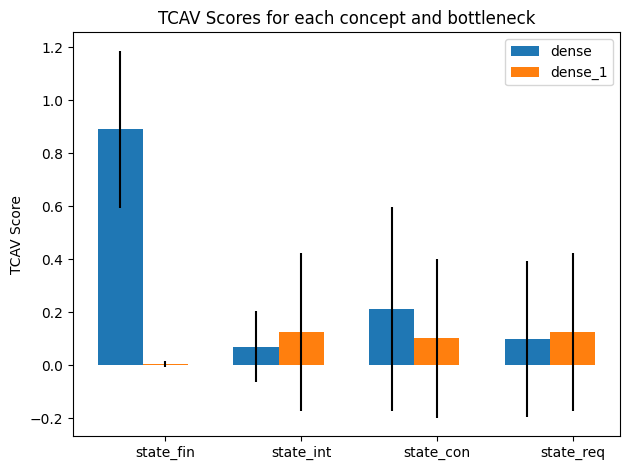

Class = Exploits
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.56 (+- 0.34), random was 0.46 (+- 0.38). p-val = 0.434 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.93 (+- 0.22), random was 0.53 (+- 0.42). p-val = 0.004 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.46 (+- 0.38). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.03 (+- 0.08), random was 0.53 (+- 0.42). p-val = 0.000 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.19), random was 0.46 (+- 0.38). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.53 (+- 0.42). p-val = 0.001 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.03), random was 0.46 (+- 0.38). p-val = 0.011 (significant)
    Bottleneck = dense_1. TCAV Score = 0.15 (+- 0.21), random was 0.53 (+- 0.42). p-val = 0.007 (significant)
{'dense': {'bn_vals

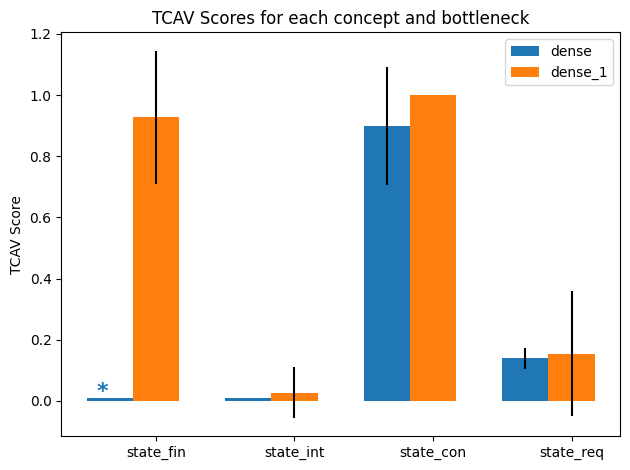

Class = Fuzzers
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.61 (+- 0.34), random was 0.48 (+- 0.35). p-val = 0.281 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.28), random was 0.52 (+- 0.44). p-val = 0.009 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.06 (+- 0.04), random was 0.52 (+- 0.44). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.92 (+- 0.14), random was 0.48 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.85 (+- 0.27), random was 0.52 (+- 0.44). p-val = 0.026 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.04 (+- 0.01), random was 0.48 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.03 (+- 0.03), random was 0.52 (+- 0.44). p-val = 0.001 (significant)
{'dense': {'bn_vals'

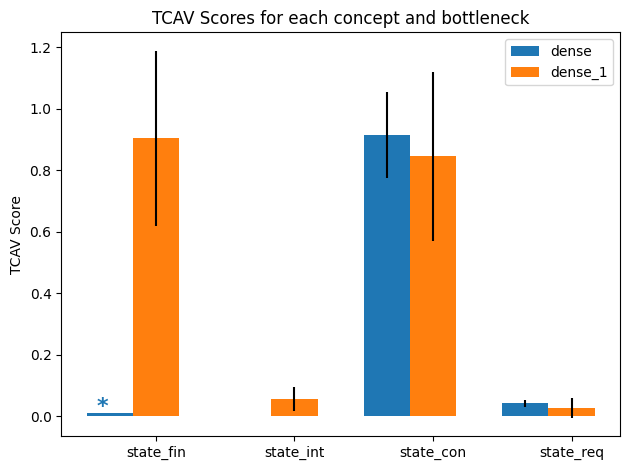

Class = DoS
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.48 (+- 0.31), random was 0.47 (+- 0.37). p-val = 0.889 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.84 (+- 0.22), random was 0.50 (+- 0.41). p-val = 0.013 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.01), random was 0.47 (+- 0.37). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 0.05 (+- 0.16), random was 0.50 (+- 0.41). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.89 (+- 0.23), random was 0.47 (+- 0.37). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.50 (+- 0.41). p-val = 0.000 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.26 (+- 0.09), random was 0.47 (+- 0.37). p-val = 0.083 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.21), random was 0.50 (+- 0.41). p-val = 0.004 (significant)
{'dense': {'bn_vals'

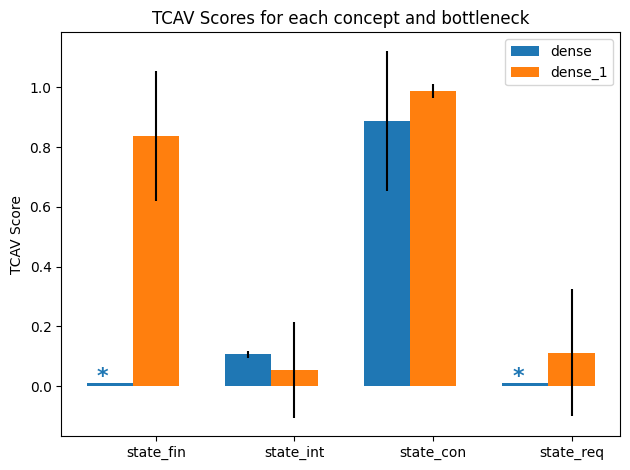

Class = Reconnaissance
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.34), random was 0.46 (+- 0.34). p-val = 0.218 (not significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.51 (+- 0.37). p-val = 0.000 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.09 (+- 0.17), random was 0.51 (+- 0.37). p-val = 0.001 (significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.91 (+- 0.08), random was 0.46 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.51 (+- 0.37). p-val = 0.000 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.51 (+- 0.37). p-val = 0.000 (significant)
{'dense': {'b

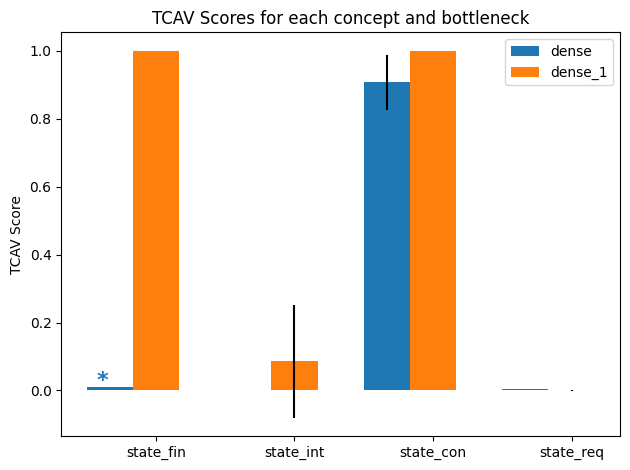

In [ ]:
utils_plot.plot_results(results1_state, num_random_exp=10)
utils_plot.plot_results(results2_state, num_random_exp=10)
utils_plot.plot_results(results3_state, num_random_exp=10)
utils_plot.plot_results(results4_state, num_random_exp=10)
utils_plot.plot_results(results5_state, num_random_exp=10)
utils_plot.plot_results(results6_state, num_random_exp=10)

Class = Normal
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.03 (+- 0.01), random was 0.46 (+- 0.31). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.47 (+- 0.38), random was 0.53 (+- 0.41). p-val = 0.650 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.66 (+- 0.23), random was 0.46 (+- 0.31). p-val = 0.055 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.53 (+- 0.41). p-val = 0.001 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.61 (+- 0.16), random was 0.46 (+- 0.31). p-val = 0.149 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.61 (+- 0.32), random was 0.53 (+- 0.41). p-val = 0.566 (not significant)
{'dense': {'bn_vals': [0.033499999999999995, 0.01, 0.01], 'bn_stds': [0.013425721582097552, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.01, 0.992, 0.01], 'bn_stds': [0, 0.016000000000000014, 0], 'significant': [False, Tr

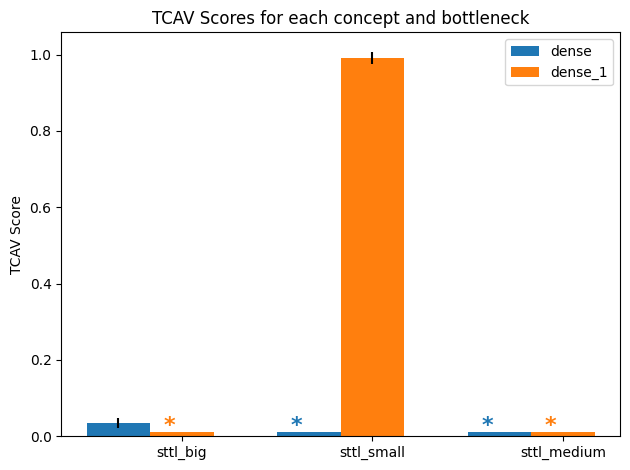

Class = Generic
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.17 (+- 0.31), random was 0.46 (+- 0.48). p-val = 0.069 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.51 (+- 0.49). p-val = 0.011 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.20 (+- 0.40), random was 0.46 (+- 0.48). p-val = 0.105 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.03 (+- 0.09), random was 0.51 (+- 0.49). p-val = 0.003 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.50 (+- 0.50), random was 0.46 (+- 0.48). p-val = 0.830 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.51 (+- 0.49). p-val = 0.011 (significant)
{'dense': {'bn_vals': [0.01, 0.01, 0.01], 'bn_stds': [0, 0, 0], 'significant': [False, False, False]}, 'dense_1': {'bn_vals': [0.1, 0.031, 0.1], 'bn_stds': [0.30000000000000004, 0.08811356308764276, 0.30000000000000004], 'significant': [True, True, T

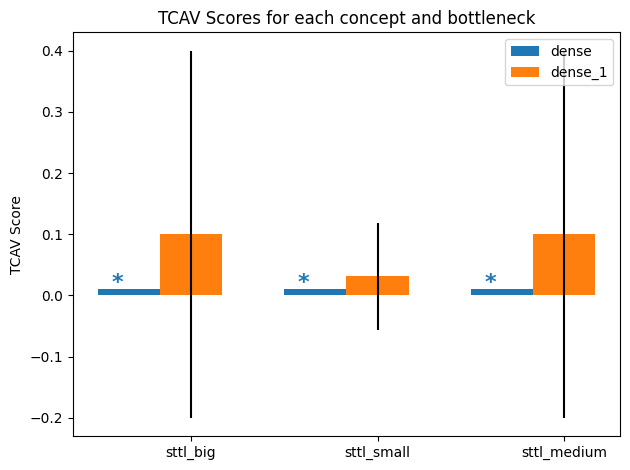

Class = Exploits
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.95 (+- 0.12), random was 0.55 (+- 0.35). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.65 (+- 0.36), random was 0.47 (+- 0.46). p-val = 0.236 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.45 (+- 0.22), random was 0.55 (+- 0.35). p-val = 0.406 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.08), random was 0.47 (+- 0.46). p-val = 0.071 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.63 (+- 0.34), random was 0.55 (+- 0.35). p-val = 0.511 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.91 (+- 0.22), random was 0.47 (+- 0.46). p-val = 0.004 (significant)
{'dense': {'bn_vals': [0.9535, 0.01, 0.01], 'bn_stds': [0.11670582676113476, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.9075], 'bn_stds': [0, 0, 0.21558351050115124], 'significant': [False, False, True]}}


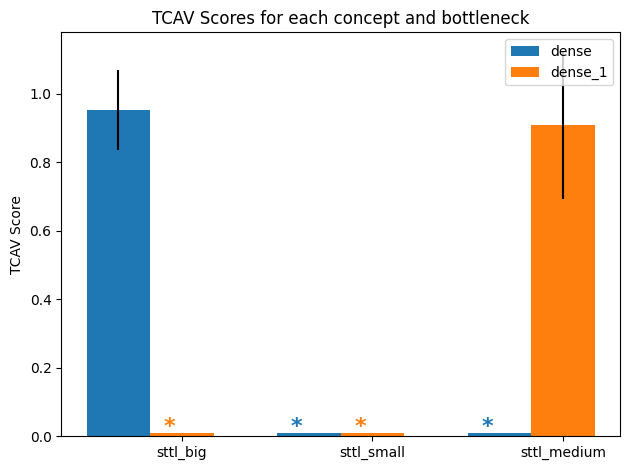

Class = Fuzzers
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.07), random was 0.54 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.31), random was 0.45 (+- 0.45). p-val = 0.012 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.25 (+- 0.13), random was 0.54 (+- 0.34). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 0.04 (+- 0.03), random was 0.45 (+- 0.45). p-val = 0.005 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.50 (+- 0.28), random was 0.54 (+- 0.34). p-val = 0.709 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.56 (+- 0.44), random was 0.45 (+- 0.45). p-val = 0.480 (not significant)
{'dense': {'bn_vals': [0.9734999999999999, 0.25, 0.01], 'bn_stds': [0.0666727080595951, 0.1347775945771403, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.8314999999999999, 0.037, 0.01], 'bn_stds': [0.3111916611993323, 0.0342198772645

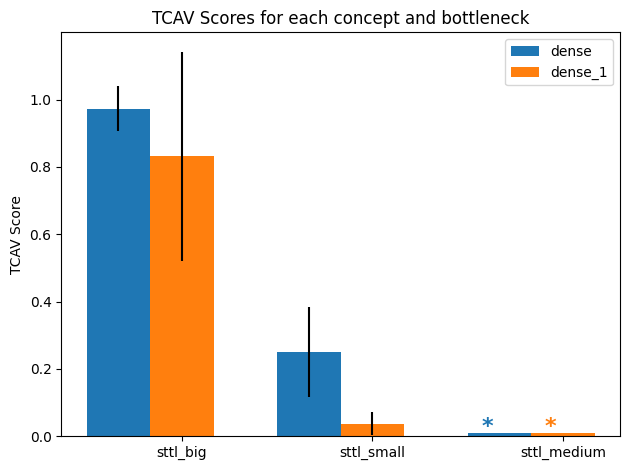

Class = DoS
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.15), random was 0.55 (+- 0.38). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.88 (+- 0.23), random was 0.49 (+- 0.44). p-val = 0.007 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.63 (+- 0.30), random was 0.55 (+- 0.38). p-val = 0.518 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.34 (+- 0.17), random was 0.49 (+- 0.44). p-val = 0.304 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.50 (+- 0.35), random was 0.55 (+- 0.38). p-val = 0.704 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.43 (+- 0.29), random was 0.49 (+- 0.44). p-val = 0.696 (not significant)
{'dense': {'bn_vals': [0.945, 0.01, 0.01], 'bn_stds': [0.1533623161014465, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.8764999999999998, 0.01, 0.01], 'bn_stds': [0.23309922779794875, 0, 0], 'significant': [True, False, Fals

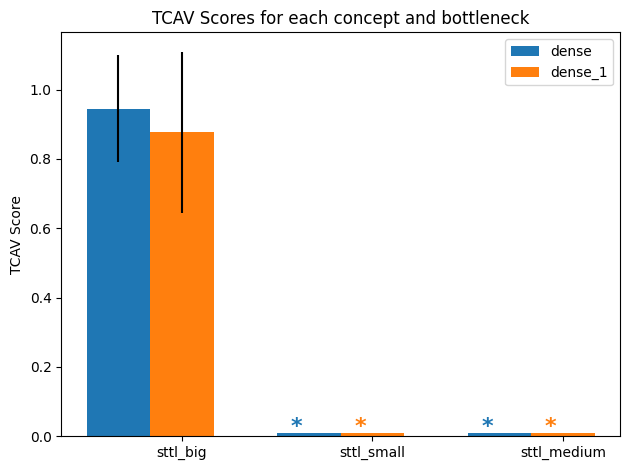

Class = Reconnaissance
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.97 (+- 0.09), random was 0.54 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.45 (+- 0.41), random was 0.47 (+- 0.42). p-val = 0.860 (not significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.38 (+- 0.18), random was 0.54 (+- 0.34). p-val = 0.146 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.34 (+- 0.16), random was 0.47 (+- 0.42). p-val = 0.318 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.29), random was 0.54 (+- 0.34). p-val = 0.636 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.76 (+- 0.25), random was 0.47 (+- 0.42). p-val = 0.035 (significant)
{'dense': {'bn_vals': [0.966, 0.01, 0.01], 'bn_stds': [0.09093404203047395, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.76], 'bn_stds': [0, 0, 0.24503061033266843], 'significant': [False, False, True]

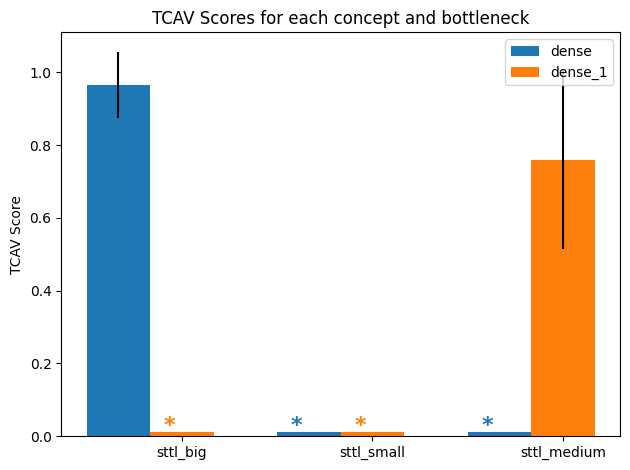

In [ ]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts=concepts_sttl
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.02), random was 0.51 (+- 0.31). p-val = 0.010 (significant)
    Bottleneck = dense_1. TCAV Score = 0.94 (+- 0.14), random was 0.50 (+- 0.39). p-val = 0.001 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.43 (+- 0.30), random was 0.51 (+- 0.31). p-val = 0.454 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.37 (+- 0.35), random was 0.50 (+- 0.39). p-val = 0.329 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.58 (+- 0.28), random was 0.51 (+- 0.31). p-val = 0.516 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.86 (+- 0.29), random was 0.50 (+- 0.39). p-val = 0.006 (significant)
{'dense': {'bn_vals': [0.7715, 0.01, 0.01], 'bn_stds': [0.01761391495380855, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.9395, 0.01, 0.8619999999999999], 'bn_stds': [0.13889654423346895, 0, 0.29329336848964044], 'significant'

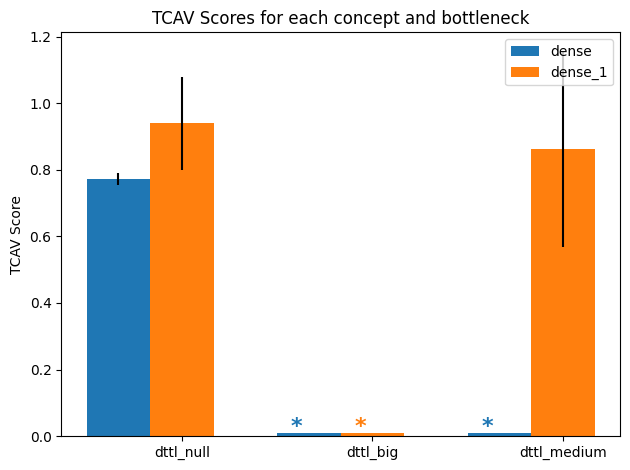

Class = Generic
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.03 (+- 0.01), random was 0.47 (+- 0.48). p-val = 0.005 (significant)
    Bottleneck = dense_1. TCAV Score = 0.02 (+- 0.06), random was 0.44 (+- 0.49). p-val = 0.009 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.48), random was 0.47 (+- 0.48). p-val = 0.771 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.02), random was 0.44 (+- 0.49). p-val = 0.007 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.30 (+- 0.45), random was 0.47 (+- 0.48). p-val = 0.275 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.13 (+- 0.30), random was 0.44 (+- 0.49). p-val = 0.054 (not significant)
{'dense': {'bn_vals': [0.029000000000000005, 0.01, 0.01], 'bn_stds': [0.010440306508910549, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.024500000000000004, 0.009, 0.01], 'bn_stds': [0.05888335927917157, 0.018, 0], 'significa

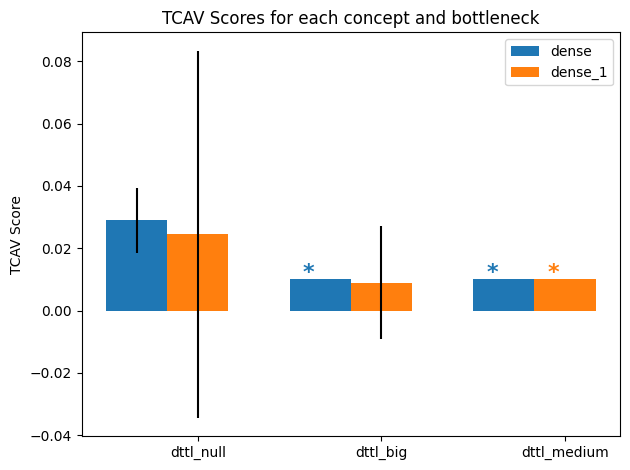

Class = Exploits
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.51 (+- 0.34). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.17 (+- 0.30), random was 0.50 (+- 0.46). p-val = 0.030 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.71 (+- 0.29), random was 0.51 (+- 0.34). p-val = 0.094 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.71 (+- 0.36), random was 0.50 (+- 0.46). p-val = 0.167 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.32), random was 0.51 (+- 0.34). p-val = 0.937 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.31 (+- 0.28), random was 0.50 (+- 0.46). p-val = 0.199 (not significant)
{'dense': {'bn_vals': [0.009999999999999998, 0.01, 0.01], 'bn_stds': [1.734723475976807e-18, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.16999999999999998, 0.01, 0.01], 'bn_stds': [0.2976659201185114, 0, 0], 'significan

/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


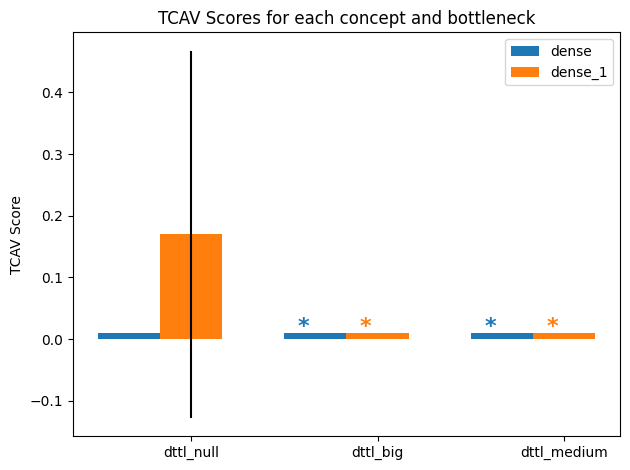

Class = Fuzzers
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.26 (+- 0.37), random was 0.53 (+- 0.46). p-val = 0.073 (not significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.69 (+- 0.28), random was 0.48 (+- 0.33). p-val = 0.066 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.74 (+- 0.40), random was 0.53 (+- 0.46). p-val = 0.164 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.38 (+- 0.29), random was 0.48 (+- 0.33). p-val = 0.369 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.37), random was 0.53 (+- 0.46). p-val = 0.033 (significant)
{'dense': {'bn_vals': [0.0, 0.01, 0.01], 'bn_stds': [0.0, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.203], 'bn_stds': [0, 0, 0.36900677500555457], 'significant': [False, False, True]}}


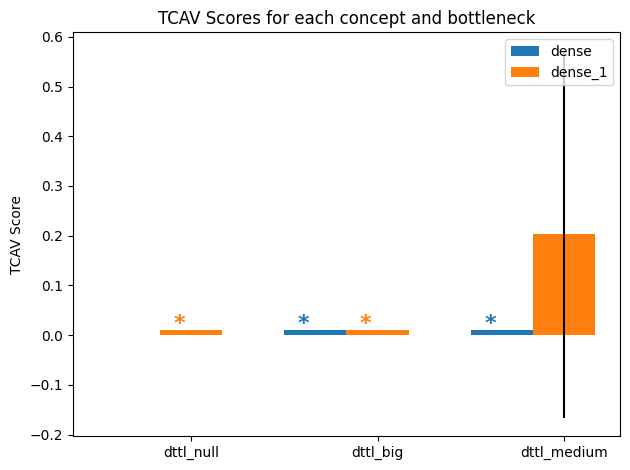

Class = DoS
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.01), random was 0.49 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.23 (+- 0.35), random was 0.50 (+- 0.44). p-val = 0.062 (not significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.62 (+- 0.29), random was 0.49 (+- 0.32). p-val = 0.237 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.76 (+- 0.37), random was 0.50 (+- 0.44). p-val = 0.086 (not significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.62 (+- 0.33), random was 0.49 (+- 0.32). p-val = 0.217 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.17 (+- 0.21), random was 0.50 (+- 0.44). p-val = 0.021 (significant)
{'dense': {'bn_vals': [0.10600000000000001, 0.01, 0.01], 'bn_stds': [0.011999999999999999, 0, 0], 'significant': [True, False, False]}, 'dense_1': {'bn_vals': [0.01, 0.01, 0.173], 'bn_stds': [0, 0, 0.21020466217474817], 'significant': [False, False, T

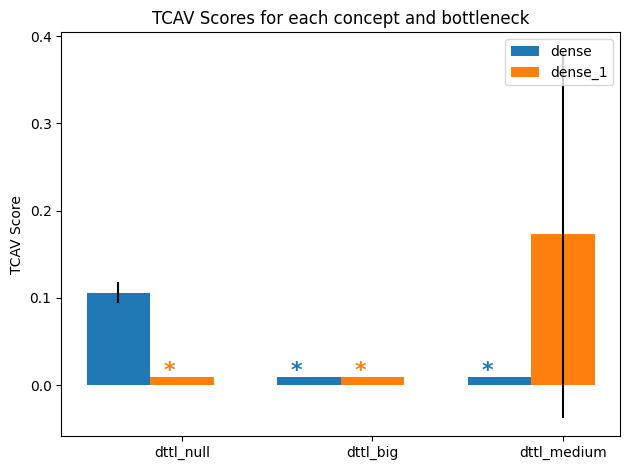

Class = Reconnaissance
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.48 (+- 0.32). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.18 (+- 0.23), random was 0.50 (+- 0.40). p-val = 0.015 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.75 (+- 0.26), random was 0.48 (+- 0.32). p-val = 0.014 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.16), random was 0.50 (+- 0.40). p-val = 0.001 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.51 (+- 0.25), random was 0.48 (+- 0.32). p-val = 0.815 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.40 (+- 0.29), random was 0.50 (+- 0.40). p-val = 0.422 (not significant)
{'dense': {'bn_vals': [0.0, 0.7460000000000001, 0.01], 'bn_stds': [0.0, 0.26154158369177166, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.1835, 0.9480000000000001, 0.01], 'bn_stds': [0.23283094725572887, 0.156, 0], 'significan

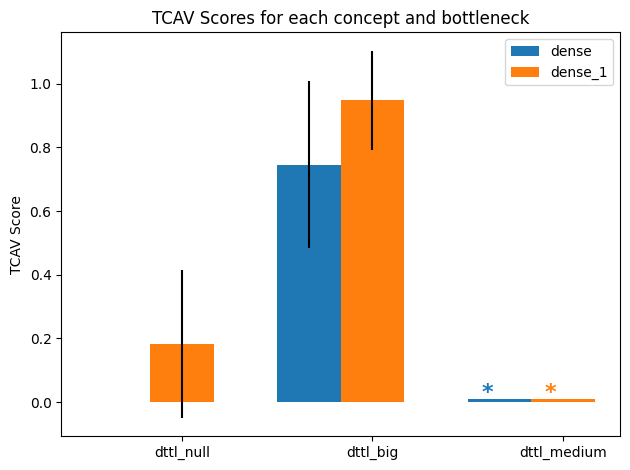

In [ ]:
#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance

concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts_service=["service_dns",  "service_http"]
concepts_dur=["duration_short", "duration_long"]
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]

target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

bottlenecks = ["dense", "dense_1" ]
#concepts = ["is_sm_ips_ports_true", "is_sm_ips_ports_false"]
concepts=concepts_dttl
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)